# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import scipy.stats as norm
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## Task 1. Prior predictive checks

In [3]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

1. Plot histograms of mu, sigma and simulated height.

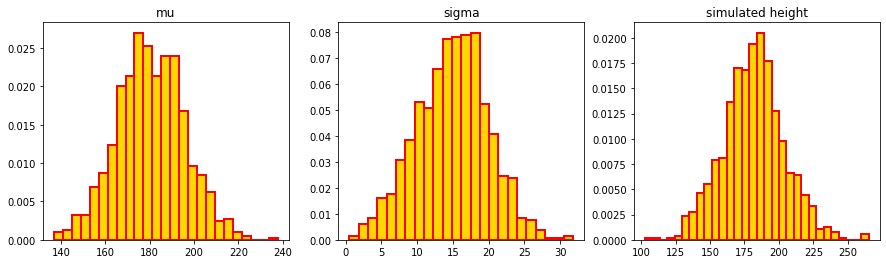

In [4]:
## 1. Plot histograms of mu, sigma and simulated height.
df = sim.draws_pd()
# display(df)
mu = df['mu']
sigma = df['sigma']
height = df['height']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(mu, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[0].set_title('mu')
axes[1].hist(sigma, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[1].set_title('sigma')
axes[2].hist(height, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[2].set_title('simulated height')
plt.show()

2. Plot a joint distribution of mu and sigma.

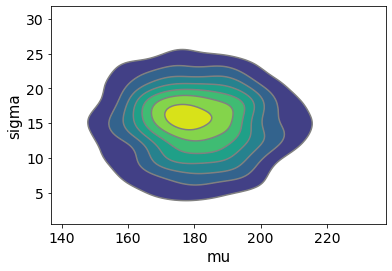

In [13]:
## 2. Plot a joint distribution of mu and sigma.
data = az.convert_to_dataset({'mu': mu, 'sigma': sigma}) # create an instance of the `InferenceData` object
az.plot_pair(data, kind='kde')
plt.show()

3. Check if samples are consistent with priors.

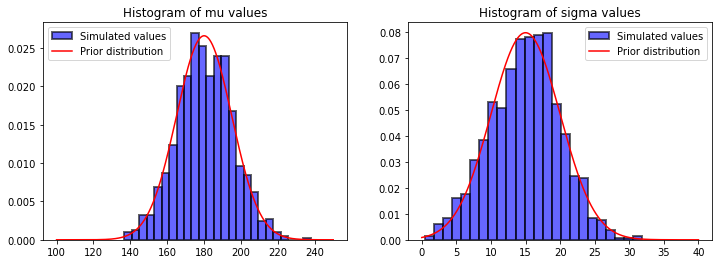

Mu prior density: 0.0266
Sigma prior density: 0.0798
Mean density: 0.0010


In [6]:
## 3. Check if samples are consistent with priors.

# Prior distributions
mu_prior = stats.norm(loc=180, scale=15)
sigma_prior = stats.norm(loc=15, scale=5)

# Plot histograms and prior distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of simulated mu values
axes[0].hist(mu, bins='auto', density=True, color = 'blue', edgecolor='black',linewidth=2, alpha=0.6, label='Simulated values', )
x = np.linspace(100, 250, 1000)
y = mu_prior.pdf(x)
axes[0].plot(x, y, color='red', label='Prior distribution')
axes[0].set_title('Histogram of mu values')
axes[0].legend()

# Histogram of simulated sigma values
axes[1].hist(sigma, bins='auto', density=True, color = 'blue', edgecolor='black',linewidth=2, alpha=0.6, label='Simulated values')
x = np.linspace(0, 40, 1000)
y = sigma_prior.pdf(x)
axes[1].plot(x, y, color='red', label='Prior distribution')
axes[1].set_title('Histogram of sigma values')
axes[1].legend()

plt.show()



# compute density for each iteration
density = mu_prior.pdf(mu) * sigma_prior.pdf(sigma)

# compute density at prior points
mu_prior_density = mu_prior.pdf(mu_prior.mean())
sigma_prior_density = sigma_prior.pdf(sigma_prior.mean())

# check if samples are consistent with priors
print(f'Mu prior density: {mu_prior_density:.4f}')
print(f'Sigma prior density: {sigma_prior_density:.4f}')
print(f'Mean density: {density.mean():.4f}')


4. Correct prior parameters to make them reasonably spreaded out.

In [7]:
# 4. Correct prior parameters to make them reasonably spreaded out.


5. Check if observed data is possible to obtain using priors.

In [8]:
# 5. Check if observed data is possible to obtain using priors.


## Task 2. Model fit and evaluation

In [9]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit.stan to exe file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit
INFO:cmdstanpy:compiled model executable: /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit.hpp /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit.stan
Warning in '/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_1_fit.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This 

In [10]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



1. Plot a joint distribution of fitted mu and sigma.

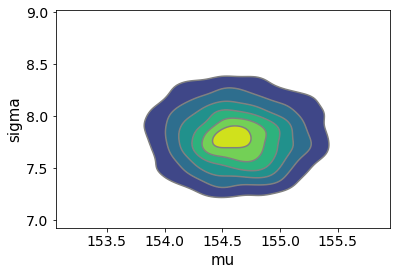

In [19]:
df = fit.draws_pd()
# display(df)
mu = df['mu']
sigma = df['sigma']
height = df['height']

data = az.convert_to_dataset({'mu': mu, 'sigma': sigma}) # create an instance of the `InferenceData` object
az.plot_pair(data, kind='kde')
plt.show()

2. Plot histograms of data and simulated heights and evaluate the quality of model.

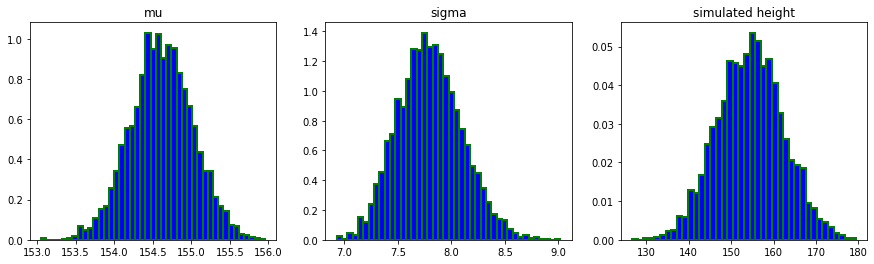

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(mu, bins='auto', density=True, color = 'blue', edgecolor='green',linewidth=2)
axes[0].set_title('mu')
axes[1].hist(sigma, bins='auto', density=True, color = 'blue', edgecolor='green',linewidth=2)
axes[1].set_title('sigma')
axes[2].hist(height, bins='auto', density=True, color = 'blue', edgecolor='green',linewidth=2)
axes[2].set_title('simulated height')
plt.show()

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [15]:
mean_weight = d['weight'].mean()
d['c_weight'] = d['weight'] - mean_weight

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

## Task 4. Prior predictive checks
 

In [ ]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc.stan to exe file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc.hpp /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc.stan
Warning in '/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/Labora

ValueError: Unable to compile Stan model file: /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2a_ppc.stan.

Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [ ]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc.stan to exe file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc.hpp /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc.stan
Warning in '/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2b_ppc.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type.

In [ ]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

NameError: name 'data_sim' is not defined

1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

## Task 6. Fitting and evaluating model


In [ ]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit.stan to exe file /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit.hpp /home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit.stan
Warning in '/home/LaboratoryClasses_Data_Analitycs/Lab_4_Linear_models_modelling_height_of_Kung_people/height_2_fit.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This 

1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [ ]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)


: 

2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 